In [1]:
%cd '/media/max/Extension/Projects/Coreference/'

/media/max/Extension/Projects/Coreference


In [2]:
from anaphoralib.corpora import rueval
from anaphoralib.tagsets import multeast
from anaphoralib import utils

%load_ext autoreload
%autoreload 2

Читаем тексты и ЗС, матчим их
--------------

### Загрузим тексты и цепочки ЗС

In [3]:
texts = rueval.load_texts('Corpus-2015/Tokens.txt')

In [4]:
gs = rueval.load_gs('Corpus-2015/Groups.txt')

In [5]:
texts['texts'][0]

[Во(Sp-a, 0),
 время(Ncnsan, 3),
 своих(P---pga, 9),
 прогулок(Ncfpgn, 15),
 в(Sp-l, 24),
 окрестностях(Ncfpln, 26),
 Симеиза(Ncmsgn, 39),
 я(P-1-snn, 47),
 обратил(Vmis-sma-p, 49),
 внимание(Ncnsan, 57),
 на(Sp-a, 66),
 одинокую(Afpfsaf, 69),
 дачу(Ncfsan, 78),
 ,(,-----, 82),
 стоявшую(Vmps-sfa-ea, 84),
 на(Sp-l, 93),
 крутом(Afpmslf, 96),
 склоне(Ncmsln, 103),
 горы(Ncfpan, 110),
 .(SENT, 114),
 К(Sp-l, 116),
 этой(P--fsla, 118),
 даче(Ncfsln, 123),
 не(Q-----, 128),
 было(Vmis-sna-e, 131),
 проведено(Vmps-snpsp, 136),
 даже(Q-----, 146),
 дороги(Afpmpns, 151),
 .(SENT, 157),
 Кругом(R-----, 159),
 она(P-3fsnn, 166),
 была(Vmis-sfa-e, 170),
 обнесена(Vmps-sfpsp, 175),
 высоким(Afpmsif, 184),
 забором(Ncmsin, 192),
 ,(,-----, 199),
 с(Sp-i, 201),
 единственной(Afpfsif, 203),
 низкой(Afpfsif, 216),
 калиткой(Ncfsin, 223),
 ,(,-----, 231),
 которая(P--fsna, 233),
 всегда(P-----r, 241),
 была(Vmis-sfa-e, 248),
 плотно(R-----, 253),
 прикрыта(Vmps-sfpsp, 260),
 .(SENT, 268),
 И(C-----, 2

### Посчитаем количество текстов и цепочек в нашем корпусе

In [6]:
len(texts['texts'])

181

In [8]:
len(gs['gs'])

181

In [9]:
n_chains = sum(len(text['chains']) for text in gs['gs'])
print 'Количество цепочек в корпусе: {}'.format(n_chains)

Количество цепочек в корпусе: 3638


In [10]:
n_groups_in_chains = sum(sum(len(text['chains'][chain]) for chain in text['chains']) for text in gs['gs'])
print 'Количество слов во всех цепочках в корпусе: {}'.format(n_groups_in_chains)

Количество слов во всех цепочках в корпусе: 16557


In [11]:
groups = [utils.find_groups(text, multeast) for text in texts['texts']]

In [13]:
groups[0]

[Во(Sp-a, 0),
 время своих прогулок(Ncnsan, 3),
 в(Sp-l, 24),
 окрестностях Симеиза(Ncfpln, 26),
 я(P-1-snn, 47),
 обратил(Vmis-sma-p, 49),
 внимание(Ncnsan, 57),
 на(Sp-a, 66),
 одинокую дачу(Ncfsan, 69),
 стоявшую(Vmps-sfa-ea, 84),
 на(Sp-l, 93),
 крутом склоне(Ncmsln, 96),
 горы(Ncfpan, 110),
 .(SENT, 114),
 К(Sp-l, 116),
 этой даче(Ncfsln, 118),
 не(Q-----, 128),
 было(Vmis-sna-e, 131),
 проведено(Vmps-snpsp, 136),
 даже(Q-----, 146),
 дороги(Afpmpns, 151),
 .(SENT, 157),
 Кругом(R-----, 159),
 она(P-3fsnn, 166),
 была(Vmis-sfa-e, 170),
 обнесена(Vmps-sfpsp, 175),
 высоким забором(Ncmsin, 184),
 с(Sp-i, 201),
 единственной низкой калиткой(Ncfsin, 203),
 которая(P--fsna, 233),
 всегда(P-----r, 241),
 была(Vmis-sfa-e, 248),
 плотно(R-----, 253),
 прикрыта(Vmps-sfpsp, 260),
 .(SENT, 268),
 И(C-----, 270),
 ни(Q-----, 272),
 куста зелени(Ncmsgn, 275),
 ни(C-----, 289),
 дерева(Ncnsgn, 292),
 не(Q-----, 299),
 виднелось(Vmis-snm-e, 302),
 над(Sp-i, 312),
 забором(Ncmsin, 316),
 .(SENT, 

In [14]:
heads_index = []

for text in groups:
    heads_index.append({})
    for group in text:
        for g in group.iter_groups():
            if g.tag not in g.tags:
                continue # rare case when the tag is constructed. TODO: add head to the Group object
            head_index = g.tags.index(g.tag)
            #head_offset = g.words[head_index].offset if isinstance(g, utils.Group) else g.offset
            # HACK: remove when autoreload is off
            #print head_index, (g.words if 'Group' in str(g.__class__) else '')
            head_offset = g.words[head_index].offset if 'Group' in str(g.__class__) else g.offset
            if head_offset not in heads_index[-1] or len(g.lemma) > len(heads_index[-1][head_offset].lemma):
                heads_index[-1][head_offset] = g

In [15]:
heads_index[0]

{0: Во(Sp-a, 0),
 3: время своих прогулок(Ncnsan, 3),
 9: своих(P---pga, 9),
 15: прогулок(Ncfpgn, 15),
 24: в(Sp-l, 24),
 26: окрестностях Симеиза(Ncfpln, 26),
 39: Симеиза(Ncmsgn, 39),
 47: я(P-1-snn, 47),
 49: обратил(Vmis-sma-p, 49),
 57: внимание(Ncnsan, 57),
 66: на(Sp-a, 66),
 69: одинокую(Afpfsaf, 69),
 78: одинокую дачу(Ncfsan, 69),
 84: стоявшую(Vmps-sfa-ea, 84),
 93: на(Sp-l, 93),
 96: крутом(Afpmslf, 96),
 103: крутом склоне(Ncmsln, 96),
 110: горы(Ncfpan, 110),
 114: .(SENT, 114),
 116: К(Sp-l, 116),
 118: этой(P--fsla, 118),
 123: этой даче(Ncfsln, 118),
 128: не(Q-----, 128),
 131: было(Vmis-sna-e, 131),
 136: проведено(Vmps-snpsp, 136),
 146: даже(Q-----, 146),
 151: дороги(Afpmpns, 151),
 157: .(SENT, 157),
 159: Кругом(R-----, 159),
 166: она(P-3fsnn, 166),
 170: была(Vmis-sfa-e, 170),
 175: обнесена(Vmps-sfpsp, 175),
 184: высоким(Afpmsif, 184),
 192: высоким забором(Ncmsin, 184),
 201: с(Sp-i, 201),
 203: единственной(Afpfsif, 203),
 216: низкой(Afpfsif, 216),
 223:

Построим индексы для слов и упоминаний:

In [16]:
words_index = []
for text in texts['texts']:
    words_index.append({text[i].offset: i for i in xrange(len(text))})

In [17]:
mentions = []
mentions_index = []
for text in texts['texts']:
    mentions.append([word for word in text 
                     if multeast.pos_filters['noun'](word) or multeast.pos_filters['pronoun'](word)])
    mentions_index.append({mentions[-1][i].offset: i for i in xrange(len(mentions[-1]))})

In [18]:
mentions[0]

[время(Ncnsan, 3),
 своих(P---pga, 9),
 прогулок(Ncfpgn, 15),
 окрестностях(Ncfpln, 26),
 Симеиза(Ncmsgn, 39),
 я(P-1-snn, 47),
 внимание(Ncnsan, 57),
 дачу(Ncfsan, 78),
 склоне(Ncmsln, 103),
 горы(Ncfpan, 110),
 этой(P--fsla, 118),
 даче(Ncfsln, 123),
 она(P-3fsnn, 166),
 забором(Ncmsin, 192),
 калиткой(Ncfsin, 223),
 которая(P--fsna, 233),
 куста(Ncmsgn, 275),
 зелени(Ncfsgn, 281),
 дерева(Ncnsgn, 292),
 забором(Ncmsin, 316),
 дачи(Ncfsgn, 332),
 уступы(Ncmpnn, 343),
 скал(Ncfpgn, 361),
 ними(P-3-pin, 371),
 кое(P--nsna, 376),
 можжевельники(Ncmpny, 398),
 сосны(Ncfpnn, 441),
 Что(P--nsnn, 449),
 фантазия(Ncfsnn, 456),
 кому(P--msdn, 472),
 голову(Ncfsan, 482),
 этом(P--msla, 503),
 утесе(Ncmsln, 521),
 кто(P--msnn, 546),
 я(P-1-snn, 567),
 дачи(Ncfsgn, 583),
 Я(P-1-snn, 589),
 кто(P--msnn, 619),
 Любопытство(Ncnsnn, 646),
 мое(P--nsna, 658),
 я(P-1-snn, 683),
 двор(Ncmsan, 718),
 жилища(Ncnsgn, 737),
 скалы(Ncfpan, 772),
 дача(Ncfsnn, 782),
 я(P-1-snn, 824),
 я(P-1-snn, 838),
 угол(

In [19]:
mentions_index[0]

{3: 0,
 9: 1,
 15: 2,
 26: 3,
 39: 4,
 47: 5,
 57: 6,
 78: 7,
 103: 8,
 110: 9,
 118: 10,
 123: 11,
 166: 12,
 192: 13,
 223: 14,
 233: 15,
 275: 16,
 281: 17,
 292: 18,
 316: 19,
 332: 20,
 343: 21,
 361: 22,
 371: 23,
 376: 24,
 398: 25,
 441: 26,
 449: 27,
 456: 28,
 472: 29,
 482: 30,
 503: 31,
 521: 32,
 546: 33,
 567: 34,
 583: 35,
 589: 36,
 619: 37,
 646: 38,
 658: 39,
 683: 40,
 718: 41,
 737: 42,
 772: 43,
 782: 44,
 824: 45,
 838: 46,
 868: 47,
 873: 48,
 880: 49,
 930: 50,
 965: 51,
 970: 52,
 981: 53,
 1010: 54,
 1023: 55,
 1040: 56,
 1058: 57,
 1088: 58,
 1112: 59,
 1131: 60,
 1153: 61,
 1167: 62,
 1183: 63,
 1212: 64,
 1221: 65,
 1233: 66,
 1249: 67,
 1263: 68,
 1269: 69,
 1291: 70,
 1317: 71,
 1321: 72,
 1342: 73,
 1370: 74,
 1381: 75,
 1390: 76,
 1395: 77,
 1412: 78,
 1425: 79,
 1443: 80,
 1453: 81,
 1461: 82,
 1471: 83,
 1479: 84,
 1529: 85,
 1533: 86,
 1544: 87,
 1550: 88,
 1557: 89,
 1564: 90,
 1608: 91,
 1638: 92,
 1643: 93,
 1650: 94,
 1675: 95,
 1704: 96,
 1711: 

Смапим ЗС на список упоминаний, построим словарь, ключи которого — id групп ЗС, а значения — индексы в списке упоминаний для вершин ЗС:

In [20]:
gs_mapping = [rueval.map_gs_on_mentions(mentions_index[i], gs['gs'][i]) for i, text in enumerate(texts['texts'])]

In [21]:
gs_mapping[0][407839]

(5,)

In [22]:
mentions[0][5]

я(P-1-snn, 47)

In [23]:
gs_index = []
for i, text in enumerate(texts['texts']):
    gs_index.append({gs_mapping[i][key][0]: key for key in gs_mapping[i]})

In [24]:
gs_index[0]

{1: 407840,
 5: 407839,
 7: 407842,
 11: 407841,
 12: 407843,
 13: 407846,
 14: 407844,
 15: 407845,
 19: 407847,
 20: 407848,
 21: 407975,
 23: 407850,
 34: 407851,
 35: 407856,
 36: 407852,
 39: 407853,
 40: 407854,
 41: 407871,
 42: 407872,
 44: 407855,
 45: 407857,
 46: 407858,
 48: 407859,
 49: 407860,
 53: 407861,
 54: 407862,
 58: 407863,
 59: 407864,
 60: 407865,
 66: 407866,
 68: 407867,
 70: 407868,
 71: 407869,
 75: 407870,
 78: 407873,
 80: 407874,
 82: 407875,
 85: 407876,
 87: 407877,
 88: 407878,
 91: 407879,
 93: 407880,
 95: 407881,
 96: 407882,
 97: 407883,
 100: 407884,
 106: 407963,
 107: 407885,
 108: 407886,
 110: 407888,
 111: 407887,
 112: 407889,
 116: 407890,
 117: 407891,
 118: 407892,
 119: 407893,
 123: 407894,
 124: 407895,
 129: 407896,
 130: 407897,
 133: 407898,
 134: 407900,
 137: 407899,
 139: 407901,
 140: 407903,
 142: 407902,
 143: 407904,
 145: 407905,
 147: 407906,
 149: 407907,
 151: 407908,
 154: 407909,
 155: 407910,
 158: 407911,
 160: 407912

Вытаскиваем признаки
-----------------------

**Список признаков**:
1. `STR_MATCH`: до этого в тексте встречается NP целиком
2. `HEAD_MATCH`: до этого в тексте встречается вершина NP
3. ?`STR_MATCH_2`: после этого в тексте встречается NP целиком
4. ?`HEAD_MATCH_2`: после этого в тексте встречается вершина NP
5. `UPPERCASE`: NP полностью в верхнем регистре
6. `CONJ`: NP — сочиненная группа
7. `DEMONSTRATIVE`: NP начинается с демонстративного маркера (этот, тот, эти, те)
8. `QUANTIFIED`: NP начинается с квантификатора (некоторые, все, никакие)
9. `PRONOUN`: NP является местоимением
10. `PROPER_NOUN`: NP является именем собственным
11. `POSSESSIVE`: NP начинается с посессивного местоимения или ИГ
12. `APPOSITIVE`: NP стоит в аппозитивной позиции
13. `NUM_ADJ`: Сколько прилагательных в NP
14. `NUM_QUAL_ADJ`: Сколько качественных прилагательных в NP
15. `NP_LEN`: Длина NP

(небинарные признаки преобразуются в бинарные путем деления пространства вариантов на отрезки)

### Загружаем специальные списки:

In [25]:
import codecs

def load_list(filename):
    data = set()
    with codecs.open(filename, encoding='utf-8') as inp_file:
        for line in inp_file:
            data.add(line.strip('\r\n'))
    
    return data

In [26]:
import os

wordlists = {}
lists_dir = 'CICLing-2016/wordlists'

for filename in os.listdir(lists_dir):
    wordlists[filename.replace('.txt', '')] = load_list(os.path.join(lists_dir, filename))

In [27]:
print wordlists.keys()

['refer_to_CommKnowl', 'adj-top50', 'role_assess', 'NewRef', 'non-identity_sim', 'possessives', 'subjectivity', 'class', 'demonstratives', 'indef']


### Строим словари и индексы:

In [28]:
import collections

word_index = []
group_index = []

for i, text in enumerate(texts['texts']):
    word_index.append(collections.defaultdict(set))
    group_index.append(collections.defaultdict(set))
    
    for word in text:
        word_index[-1]['_'.join(word.lemma)].add(word.offset)
    for group in groups[i]:
        for g in group.iter_groups():
            group_index[-1]['_'.join(g.lemma)].add(g.offset)

In [29]:
print '\n'.join(group_index[0].keys())

спокойно
кой
другой_сторона_можжевелового_куст
линия
поднять
прежде
кругом
подставить
хотя
и
хоть
случиться
вышележащие
поддерживать
небольшой
удовлетворить
человек
страшный_грохот
появление
более
кто
румяный
оттуда
внешний_мир
дрогнуть
встать
единственный_низкий_калитка
глыба
чувствовать
голый
поразить
над
изменить
атлет
огромный
исказиться
горный
желтоватый
несколько
среди
легкость
пойти
камень_различный_величина
подумать
невозделан
так
там
профессор_вагнер
некоторый
четыре
застонать
линия_полет
прикрыть
сосна
правда
кривой_горный_сосна
что
начать
столько
удаться
достаточно
довольно
прогулка
можжевельники
следить
далеко
человеческий_рост
весело
опуститься
новый_попытка
калитка
продолжать
заметить
голый_утес
небольшой_горный_площадка
двор
полететь
всегда
обитатель_дача
можжевеловым_куст
наделавшего
ответить
очевидно
параллельно
медленно
различный
стоять
захотеться
прыжок
метр
кривой
чахлый_можжевельники
куст
одинокий
откос
!
большой
помочь
маленький_камешек
сторона
откуда
разбросать
п

In [30]:
adjectives = set()
for text in texts['texts']:
    for word in text:
        if multeast.pos_filters['adj'](word) and (len(word.tag) < 7 or word.tag[6] == 'f'):
            adjectives.add('_'.join(word.lemma))

adjectives = list(adjectives)

In [31]:
pronouns = set()
for text in texts['texts']:
    for word in text:
        if multeast.pos_filters['pronoun'](word):
            pronouns.add('_'.join(word.lemma))

pronouns = list(pronouns)

### Строим вектор признаков

In [223]:
import re
rx_lat = re.compile('[A-Za-z]')

def get_feature_vector(group, i_text, feat_zones=('ng+cardie', 'np-len', 'adj', 'lists', 'ne'), 
                       out_lists=None, out_adj=None):
    global feature_names
    
    vctr = []
    feature_names = []
    
    group_lemma = '_'.join(group.lemma)
    group_occurrences = group_index[i_text][group_lemma] if group_lemma in group_index[i_text] else []
    
    head_index = group.tags.index(group.tag)
    head_lemma = group.lemma[head_index]
    head_occurrences = word_index[i_text][head_lemma] if head_lemma in word_index[i_text] else []
    #head_offset = group.words[head_index].offset if isinstance(group, utils.Group) else group.offset
    # HACK: remove when autoreload is off
    head_offset = group.words[head_index].offset if 'Group' in str(group.__class__) else group.offset
    
    #group_words = group.words if isinstance(group, utils.Group) else [group]
    group_words = group.words if 'Group' in str(group.__class__) else [group] # HACK: remove when autoreload is off
    
    str_matches_before = sum(1 for occ in group_occurrences if occ < group.offset)
    head_matches_before = sum(1 for occ in head_occurrences if occ < head_offset)
    
    features_info = {'str_matches_before': str_matches_before,
                    'head_matches_before': head_matches_before}
    
    adj_in_group = [word for word in group_words[:head_index+1] if multeast.pos_filters['adj'](word)]
    pronouns = {u"его", u"ее", u"её", u"ей", u"ему", u"ею", u"им", u"ими", u"их", u"которая", 
                u"которого", u"которое", u"которой", u"котором", u"которому", u"которую", u"которые", 
                u"который", u"которым", u"которыми", u"которых", u"него", u"нее", u"неё", u"ней", u"нем", 
                u"нём", u"нему", u"нею", u"ним", u"ними", u"них", u"он", u"она", u"они", u"оно", u"свое", 
                u"своё", u"своего", u"своей", u"своем", u"своём", u"своему", u"своею", u"свой", u"свои", 
                u"своим", u"своими", u"своих", u"свою", u"своя", u"себе", u"себя", u"собой", u"собою"}
    
    if 'string' in feat_zones:
        # STR_MATCH
        vctr.append(str_matches_before == 0)
        feature_names.append('str_match_before=0')
        vctr.append(str_matches_before < 2)
        feature_names.append('str_match_before<2')
        vctr.append(str_matches_before < 3)
        feature_names.append('str_match_before < 3')
        vctr.append(str_matches_before > 2)
        feature_names.append('str_match_before>2')
        #vctr.append(sum(1 for occ in group_occurrences if occ < group.offset))
        #feature_names.append('str_match_before')
    
        # HEAD_MATCH
        vctr.append(head_matches_before == 0)
        feature_names.append('head_match_before=0')
        vctr.append(head_matches_before < 2)
        feature_names.append('head_match_before<2')
        vctr.append(head_matches_before < 3)
        feature_names.append('head_match_before < 3')
        vctr.append(head_matches_before > 2)
        feature_names.append('head_match_before>2')
        #vctr.append(sum(1 for occ in head_occurrences if occ < head_offset))
        #feature_names.append('head_match_before')
    
        # STR_MATCH_2
        #vctr.append(sum(1 for occ in group_occurrences if occ > group.offset) == 0)
        #feature_names.append('str_match_after=0')
        #vctr.append(sum(1 for occ in group_occurrences if occ > group.offset) == 1)
        #feature_names.append('str_match_after=1')
        #vctr.append(sum(1 for occ in group_occurrences if occ > group.offset) == 2)
        #feature_names.append('str_match_after=2')
        #vctr.append(sum(1 for occ in group_occurrences if occ > group.offset) > 2)
        #feature_names.append('str_match_after>2')
        #vctr.append(sum(1 for occ in group_occurrences if occ > group.offset))
        #feature_names.append('str_match_after')

        # HEAD_MATCH_2
        #vctr.append(sum(1 for occ in head_occurrences if occ > head_offset) == 0)
        #feature_names.append('head_match_after=0')
        #vctr.append(sum(1 for occ in head_occurrences if occ > head_offset) == 1)
        #feature_names.append('head_match_after=1')
        #vctr.append(sum(1 for occ in head_occurrences if occ > head_offset) == 2)
        #feature_names.append('head_match_after=2')
        #vctr.append(sum(1 for occ in head_occurrences if occ > head_offset) > 2)
        #feature_names.append('head_match_after>2')
        #vctr.append(sum(1 for occ in head_occurrences if occ > head_offset))
        #feature_names.append('head_match_after')
    
        # UPPERCASE
        vctr.append(all(word.isupper() and len(word) > 1 for word in group.wordform))
        feature_names.append('uppercase')

        # CAPITALIZED
        #vctr.append(any(word[0].isupper() and len(group.wordform) > 1 for word in group.wordform[1:]))
        #feature_names.append('capitalized')

        # LATIN
        vctr.append(any(rx_lat.search(word) for word in group.wordform))
        feature_names.append('latin')
        
        # PROPER_NOUN
        vctr.append(multeast.pos_filters['properNoun'](group))
        feature_names.append('is_proper_noun')
    
        # PRONOUN
        #vctr.append(multeast.pos_filters['pronoun'](group) or group.wordform[0] in pronouns)
        vctr.append(group.wordform[0] in pronouns)
        feature_names.append('is_pronoun')
    
    if 'struct' in feat_zones:
        # CONJ
        i_word = words_index[i_text][group.offset]
        left_word = texts['texts'][i_text][i_word - 1] if i_word > 0 else None
        right_word = texts['texts'][i_text][i_word + len(group.wordform) + 1] \
                            if i_word + len(group.wordform) + 1 < len(texts['texts'][i_text]) else None
        vctr.append(bool((left_word and multeast.pos_filters['conj'](left_word)) 
                    or (right_word and multeast.pos_filters['conj'](right_word))))
        feature_names.append('conj')
    
        # LEN_NP
        #vctr.append(len(group.wordform))
        #feature_names.append('len_np')
        #vctr.append(len(group.tags) == 1)
        #feature_names.append('len_np=1')
        #vctr.append(len(group.tags) == 2)
        #feature_names.append('len_np=2')
        vctr.append(len(group.tags) < 2)
        feature_names.append('len_np<2')
        vctr.append(len(group.tags) > 2)
        feature_names.append('len_np>2')
        #vctr.append(len(group.tags) == 4)
        #feature_names.append('len_np=4')
        #vctr.append(len(group.tags) == 5)
        #feature_names.append('len_np=5')
        #vctr.append(len(group.tags) > 5)
        #feature_names.append('len_np>5')
    
        # NUM_ADJ
        #vctr.append(len(adj_in_group))
        #feature_names.append('n_adj')
    
        vctr.append(len(adj_in_group) == 0)
        feature_names.append('n_adj=0')
        vctr.append(len(adj_in_group) > 1)
        feature_names.append('n_adj > 1')
        vctr.append(len(adj_in_group) > 2)
        feature_names.append('n_adj>2')
        #vctr.append(1 < len(adj_in_group) < 4)
        #feature_names.append('n_adj=(2,3)')
        #vctr.append(len(adj_in_group) > 3)
        #feature_names.append('n_adj>3')
        
        if len(adj_in_group) > 1 and not (group.wordform[0] in pronouns) and out_adj:
            out_adj.write('{}\t{}'.format(len(adj_in_group), group))
    features_info['n_adj'] = len(adj_in_group)
    features_info['len_np'] = len(group_words)
    
    if 'lists' in feat_zones:
        #group_bigrams = group.lemma[:head_index+1]
        # ALL_LISTS
        for l in wordlists:
            #if l in ('demonstratives', 'possessives'):
            #    continue
            vctr.append(any(lemma in wordlists[l] for lemma in group.lemma[:head_index+1]))
            if vctr[-1] and not (group.wordform[0] in pronouns) and out_lists:
                out_lists.write('{}\t{}'.format(l, group))
            #if l == 'non-identity_sim' and any(lemma in wordlists[l] for lemma in group.lemma):
            #    print group
            feature_names.append('in_list_{}'.format(l))
    
        # DEMONSTRATIVES
        #vctr.append(group.lemma[0] in wordlists['demonstratives'])
        #feature_names.append('starts_with_demonstrative')
    
        # QUANTIFIERS
        #vctr.append(multeast.pos_filters['quant'](group_words[0]))
        #feature_names.append('starts_with_quantifier')

        # POSSESSIVES
        #vctr.append(group.lemma[0] in wordlists['possessives'])
        #feature_names.append('starts_with_possessive')
    
    apposition = False
    first_word_index = words_index[i_text][group.offset]
    last_word_index = first_word_index + len(group.wordform)
    left_context = first_word_index - 5 if first_word_index > 5 else 0
    right_context = last_word_index + 5 if last_word_index + 5 < len(texts['texts'][i_text]) - 1 \
                                                    else len(texts['texts'][i_text]) - 1
    i_left = first_word_index
    i_right = last_word_index
    
    left_edge = None
    right_edge = None
    #print first_word_index, last_word_index, left_context, right_context
    while i_left >= left_context and i_right <= right_context and (not left_edge or not right_edge):
        left_word = texts['texts'][i_text][i_left]
        right_word = texts['texts'][i_text][i_right]
        
        if not left_edge:
            if left_word.wordform[0] == ',':
                left_edge = i_left
            i_left -= 1
        if not right_edge:
            if right_word.wordform[0] == ',':
                right_edge = i_right
            i_right += 1
        
        if left_word.tag == 'SENT' or right_word.tag == 'SENT':
            break
            
    if left_edge and right_edge:
        context_words = texts['texts'][i_text][left_edge:right_edge+1]
        apposition = not any(word.tag.startswith('Vmi') for word in context_words)
        #if apposition:
        #    print ' '.join(' '.join(word.wordform) for word in context_words)
    #vctr.append(apposition)
    #feature_names.append('apposition')
    
    return vctr, features_info

In [34]:
wordlists.keys()

['refer_to_CommKnowl',
 'adj-top50',
 'role_assess',
 'NewRef',
 'non-identity_sim',
 'possessives',
 'subjectivity',
 'class',
 'demonstratives',
 'indef']

### Преобразуем тексты в `x_data` и `y_data`

In [35]:
chains_index = []
for i, gs_chains in enumerate(gs['gs']):
    chains_index.append({})
    for chain_id in gs_chains['chains']:
        chains_index[-1].update(dict((group_id, chain_id) for group_id in gs_chains['chains'][chain_id]))

In [36]:
chains_index[0][407975]

1054

Готовим данные для тернарной классификации (`singleton / first / recurring`)

In [35]:
def get_features_multiclass(feature_zones=('ng+cardie', 'len-np', 'adj', 'lists', 'ne')):
    x_data = []
    y_data = []

    global feature_names

    cur_data = 'Multiclass'
    class_names = ('singleton', 'first', 'recurring')

    for i_text, text in enumerate(texts['texts']):
        for i, mention in enumerate(mentions[i_text]):
            if i not in gs_index[i_text]:
                #y_data.append('singleton')
                y_data.append(class_names.index('singleton'))
            else:
                cur_gs_group_id = gs_index[i_text][i]
                cur_chain = gs['gs'][i_text]['chains'][chains_index[i_text][cur_gs_group_id]]
                #y_data.append('first' if cur_gs_group_id == cur_chain[0] else 'recurring')
                y_data.append(class_names.index('first') if cur_gs_group_id == cur_chain[0] 
                              else class_names.index('recurring'))

            group = heads_index[i_text][mention.offset]
            x_data.append(get_feature_vector(group, i_text))
        
    class_numbers = [sum(1 for item in y_data if item == cur_class) for cur_class in range(len(class_names))]
    ratio = float(max(class_numbers) / float(min(class_numbers)))
    
    return x_data, y_data, feature_names, ratio

Готовим данные для бинарной классификации (`first / non-first+singleton`)

In [36]:
def get_features_binary_singletons_are_non_first(feature_zones=('ng+cardie', 'len-np', 'adj', 'lists', 'ne')):
    x_data = []
    y_data = []

    global feature_names

    cur_data = 'Binary, singletons are non-first mentions'
    class_names = ('non-first', 'first')

    for i_text, text in enumerate(texts['texts']):
        for i, mention in enumerate(mentions[i_text]):
            if i not in gs_index[i_text]:
                #y_data.append('non-first')
                y_data.append(bool(class_names.index('non-first')))
            else:
                cur_gs_group_id = gs_index[i_text][i]
                cur_chain = gs['gs'][i_text]['chains'][chains_index[i_text][cur_gs_group_id]]
                #y_data.append('first' if cur_gs_group_id == cur_chain[0] else 'non-first')
                y_data.append(bool(class_names.index('first')) if cur_gs_group_id == cur_chain[0] 
                              else bool(class_names.index('non-first')))

            group = heads_index[i_text][mention.offset]
            x_data.append(get_feature_vector(group, i_text))
    
    class_numbers = [sum(1 for item in y_data if item == cur_class) for cur_class in range(len(class_names))]
    ratio = float(max(class_numbers) / float(min(class_numbers)))
    
    return x_data, y_data, feature_names, ratio

Готовим данные для бинарной классификации (`first+singleton / non-first`)

In [37]:
def get_features_binary_singletons_are_first(feature_zones=('ng+cardie', 'len-np', 'adj', 'lists', 'ne')):
    x_data = []
    y_data = []

    global feature_names

    cur_data = 'Binary, singletons are first mentions'
    class_names = ('non-first', 'first')

    for i_text, text in enumerate(texts['texts']):
        for i, mention in enumerate(mentions[i_text]):
            if i not in gs_index[i_text]:
                #y_data.append('non-first')
                y_data.append(bool(class_names.index('non-first')))
            else:
                cur_gs_group_id = gs_index[i_text][i]
                cur_chain = gs['gs'][i_text]['chains'][chains_index[i_text][cur_gs_group_id]]
                #y_data.append('first' if cur_gs_group_id == cur_chain[0] else 'non-first')
                y_data.append(bool(class_names.index('first')) if cur_gs_group_id == cur_chain[0] 
                              else bool(class_names.index('non-first')))

            group = heads_index[i_text][mention.offset]
            x_data.append(get_feature_vector(group, i_text))
        
    class_numbers = [sum(1 for item in y_data if item == cur_class) for cur_class in range(len(class_names))]
    ratio = float(max(class_numbers) / float(min(class_numbers)))
    
    return x_data, y_data, feature_names, ratio

Готовим данные для бинарной классификации (`first / non-first`)

In [224]:
class_names = ('non-first', 'first')
cur_data = 'Binary, filtered singletons'
feature_values = []

def get_features_binary_no_singletons(feature_zones=('string, struct', 'lists')):
    x_data = []
    y_data = []
    
    global feature_values
    global class_names

    cur_data = 'Binary, filtered singletons'
    class_names = ('non-first', 'first')
    
    import codecs
    #out_adj = codecs.open('out_adj.csv', 'w', encoding='utf-8')
    out_adj = open('out_adj.csv', 'w')
    #out_lists = codecs.open('out_lists.csv', 'w', encoding='utf-8')
    out_lists = open('out_lists.csv', 'w')

    for i_text, text in enumerate(texts['texts']):
        for i, mention in enumerate(mentions[i_text]):
            if i not in gs_index[i_text]:
                #y_data.append('non-first')
                #y_data.append(bool(class_names.index('non-first')))
                continue
            else:
                cur_gs_group_id = gs_index[i_text][i]
                cur_chain = gs['gs'][i_text]['chains'][chains_index[i_text][cur_gs_group_id]]
                #if len(cur_chain) == 2:
                #    continue
                #y_data.append('first' if cur_gs_group_id == cur_chain[0] else 'non-first')
                y_data.append(bool(class_names.index('first')) if cur_gs_group_id == cur_chain[0] 
                              else bool(class_names.index('non-first')))

            group = heads_index[i_text][mention.offset]
            #x_data.append(get_feature_vector(group, i_text, feat_zones=('np-len','adj', 'lists', 'ne')) + [group])
            vctr, features_info = get_feature_vector(group, i_text, feat_zones=feature_zones, out_adj=out_adj, 
                                                     out_lists=out_lists)
            x_data.append(vctr + [group])
            
            if vctr[feature_names.index('is_pronoun')]:
                x_data.pop()
                y_data.pop()
                continue
            
            feature_values.append(features_info)
            
            out_adj.write(u'\t{}\n'.format(bool(y_data[-1])))
            out_lists.write(u'\t{}\n'.format(bool(y_data[-1])))
            
    
    class_numbers = [sum(1 for item in y_data if item == cur_class) for cur_class in range(len(class_names))]
    ratio = float(max(class_numbers) / float(min(class_numbers)))
    
    return x_data, y_data, feature_names, ratio

### Добавим мешков

In [39]:
import sklearn.feature_extraction.text
adj_vectorizer = sklearn.feature_extraction.text.CountVectorizer(vocabulary=adjectives)
pron_vectorizer = sklearn.feature_extraction.text.CountVectorizer(vocabulary=pronouns)

In [40]:
def additional_features(data, vectorizer):
    additional_features = np.zeros(shape=(len(data), len(vectorizer.vocabulary)))
    for i, row in enumerate(data):
        additional_features[i,:] = vectorizer.transform([u' '.join(row[-1].lemma)]).toarray()
    
    return additional_features

In [41]:
from sklearn.preprocessing import MinMaxScaler

def rank_to_dict(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x, 4), ranks)
    return dict(zip(names, ranks ))

In [ ]:
add_data_x = additional_features(x_data, adj_vectorizer)
adj_clf = RandomForestClassifier()
adj_clf.fit(add_data_x, y_data)

print adj_clf.feature_importances_

In [ ]:
ranks = rank_to_dict(adj_clf.feature_importances_, adj_vectorizer.vocabulary)

for feat_name in sorted(ranks, key=lambda f: ranks[f], reverse=True):
    print feat_name, ranks[feat_name]

In [ ]:
test_classify(y_data, adj_clf.predict(add_data_x), adj_clf.classes_, class_names)

### Получаем распределеия значений признаков

In [225]:
feature_groups = ('string', 'struct', 'lists')
x_data, y_data, feature_names, ratio = get_features_binary_no_singletons(feature_groups)

In [226]:
new_x_data = [(feature_values[i], x_data[i]) for i in range(len(x_data))]

In [227]:
from sklearn import cross_validation
x_data_train, x_data_test, y_data_train, y_data_test = cross_validation.train_test_split(new_x_data, 
                                                                                         y_data, 
                                                                                         test_size=0.3,
                                                                                         random_state=42)

In [228]:
feature_values_train = [item[0] for item in x_data_train]

In [229]:
x_data_train = [item[1] for item in x_data_train]
x_data_test = [item[1] for item in x_data_test]

In [230]:
feature_distributions = {feat_name: {cls: [] for cls in class_names + ('total',)} 
                         for feat_name in feature_values_train[0]}

In [231]:
for i, row in enumerate(feature_values_train):
    cur_key = class_names[int(y_data_train[i])]
    for feat_name in row:
        feature_distributions[feat_name][cur_key].append(row[feat_name])
        feature_distributions[feat_name]['total'].append(row[feat_name])

In [232]:
feature_distributions['n_adj']['first'][:10]

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

In [233]:
feature_distributions.keys()

['str_matches_before', 'len_np', 'head_matches_before', 'n_adj']

In [234]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [235]:
from math import sqrt
SPINE_COLOR = 'gray'

In [236]:
def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': ['\usepackage{gensymb}'],
              'axes.labelsize': 8, # fontsize for x and y labels (was 10)
              'axes.titlesize': 8,
              'text.fontsize': 8, # was 10
              'legend.fontsize': 8, # was 10
              'xtick.labelsize': 8,
              'ytick.labelsize': 8,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax

In [237]:
latexify()

In [368]:
def plot_feat_distribution(distribution, x_label='Feature value', filename='plot.pdf'):
    bins = range(5)
    
    ax = plt.gca()
    ax.set_xlabel(x_label)
    ax.set_ylabel("Density")
    #ax.set_title("Distribution of feature")
    plt.tight_layout()
    format_axes(ax)
    
    #plt.hist(distribution['first'], color="0.1", bins=bins, alpha=0.5, label='first', normed=True)
    #plt.hist(distribution['non-first'], color="0.8", bins=bins, alpha=0.5, label='non-first', normed=True)
    #plt.savefig("{}.pdf".format(filename))
    #plt.show()
    #plt.close()
    
    first_hist = np.histogram(distribution['first'], bins, normed=True)
    nonfirst_hist = np.histogram(distribution['non-first'], bins, normed=True)
    
    w = 0.3
    
    first_x = [item for item in range(len(first_hist[0]))]
    non_first_x = [item+w for item in range(len(nonfirst_hist[0]))]
    
    ax.set_xticks([item + float(w) for item in first_x])
    ax.set_xticklabels(first_x)
    
    rects1 = plt.bar(non_first_x, nonfirst_hist[0], w, color='0.3')
    rects2 = plt.bar(first_x, first_hist[0], w, color='0.7')
    plt.legend((rects1, rects2), class_names, loc='upper right')
    
    print class_names
    
    plt.savefig("{}.pdf".format(filename))
    plt.show()
    plt.close()

('non-first', 'first')


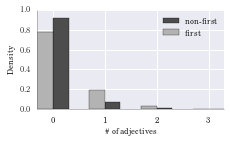

('non-first', 'first')


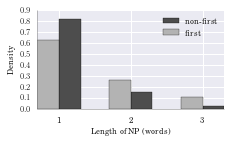

In [369]:
plot_feat_distribution(feature_distributions['n_adj'], x_label='\# of adjectives', filename='n_adj')
plot_feat_distribution(feature_distributions['len_np'], x_label='Length of NP (words)', filename='len_np')

('non-first', 'first')


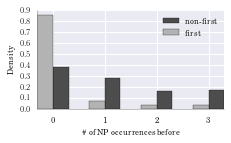

('non-first', 'first')


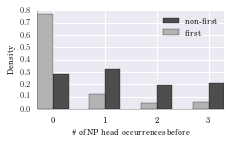

In [370]:
plot_feat_distribution(feature_distributions['str_matches_before'], 
                       x_label='\# of NP occurrences before', filename='n_np')
plot_feat_distribution(feature_distributions['head_matches_before'], 
                       x_label='\# of NP head occurrences before', filename='n_head')

('non-first', 'first')


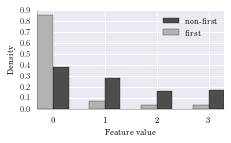

In [371]:
plot_feat_distribution(feature_distributions['str_matches_before'], filename='str_matches_before')

('non-first', 'first')


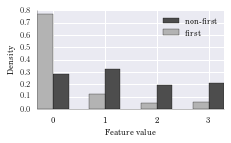

In [372]:
plot_feat_distribution(feature_distributions['head_matches_before'], filename='head_matches_before')

Строим классификатор и тестируем качество
------------------------------------------

In [373]:
from unbalanced_dataset import UnderSampler, NearMiss, CondensedNearestNeighbour, OneSidedSelection, \
NeighbourhoodCleaningRule, TomekLinks, ClusterCentroids, OverSampler, SMOTE, \
SMOTETomek, SMOTEENN, EasyEnsemble, BalanceCascade

In [146]:
class_numbers = [sum(1 for item in y_data if item == cur_class) for cur_class in range(len(class_names))]

ratio = float(max(class_numbers) / float(min(class_numbers)))
print ratio

2.54776119403


In [ ]:
cur_sampling = 'Undersampling'
sampler = UnderSampler(verbose=True)

In [ ]:
# Doesn't work neither in binary nor in ternary case
cur_sampling = 'TomekLinks'
sampler = TomekLinks(verbose=True)

In [ ]:
cur_sampling = 'NearMiss'
sampler = NearMiss(version=1, verbose=True)

In [ ]:
cur_sampling = 'NearMiss'
sampler = NearMiss(version=3, verbose=True)

In [ ]:
cur_sampling = 'CondensedNearestNeighbour, size_ngh=10, n_seeds_S=10'
sampler = CondensedNearestNeighbour(size_ngh=10, n_seeds_S=10, verbose=True)

In [ ]:
# this one gives some precision in a multiclass case
cur_sampling = 'Oversampling, ratio={:.3f}'.format(ratio)
sampler = OverSampler(ratio=ratio)

In [ ]:
cur_sampling = 'NeighbourhoodCleaningRule, size_ngh=100'
sampler = NeighbourhoodCleaningRule(size_ngh=100)

In [ ]:
cur_sampling = 'SMOTE, kind=regular, ratio={:.3f}'.format(ratio)
sampler = SMOTE(ratio=ratio, kind='regular')

In [ ]:
cur_sampling = 'SMOTE, kind=borderline1, ratio={:.3f}'.format(ratio)
sampler = SMOTE(ratio=ratio, verbose=True, kind='borderline1')

In [ ]:
# this one works fine in a multiclass case
cur_sampling = 'SMOTE, kind=svm, ratio={:.3f}'.format(ratio)
svm_args={'class_weight' : 'auto'}
sampler = SMOTE(ratio=ratio, verbose=True, kind='svm', **svm_args)

In [ ]:
cur_sampling = 'SMOTETomek, ratio={:.3f}'.format(ratio)
sampler = SMOTETomek(ratio=ratio)

In [ ]:
cur_sampling = 'EasyEnsemble'
sampler = EasyEnsemble(verbose=True)

In [ ]:
cur_sampling = 'BalanceCascade'
sampler = BalanceCascade(verbose=False)

In [147]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_selection import SelectKBest, SelectPercentile, chi2

from sklearn import cross_validation
from sklearn import metrics

import numpy as np

#%pylab inline
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.sparse

#clf = RandomForestClassifier(n_estimators=200, random_state=42)
#clf = MultinomialNB()
#clf = LinearSVC()
#clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5))
#clf = DecisionTreeClassifier(criterion='gini')
#clf = DecisionTreeClassifier(criterion='entropy')
clf = SVC()

In [148]:
def fit_clf(x_data, y_data, clf, sampler):
    clf_name = str(clf)[:str(clf).find('(')]
    print 'Эксперимент "{} with {}, classifier={}"'.format(cur_data, cur_sampling, clf_name)
    x_data_train, x_data_test, y_data_train, y_data_test = cross_validation.train_test_split(x_data, 
                                                                                             y_data, 
                                                                                             test_size=0.3,
                                                                                             random_state=42)
    groups_train = [row[-1] for row in x_data_train]
    groups_test = [row[-1] for row in x_data_test]

    x_data_train = [row[:-1] for row in x_data_train]
    x_data_test = [row[:-1] for row in x_data_test]

    #feat_sel = SelectKBest(chi2, k=10)
    #feat_sel.fit(x_add_train, y_data_train)

    #best_adj = {adj_vectorizer.vocabulary[i]:feat_sel.scores_[i] 
    #            for i in xrange(len(feat_sel.scores_)) if not np.isnan(feat_sel.scores_[i])}
    #feature_names = feature_names[:len(x_data[0])-1]

    sampled_x_train, sampled_y_train = sampler.fit_transform(np.array(x_data_train), np.array(y_data_train))
    if isinstance(sampler, EasyEnsemble) or isinstance(sampler, BalanceCascade):
        sampled_x_train = sampled_x_train[-1]
        sampled_y_train = sampled_y_train[-1]
    clf.fit(sampled_x_train, sampled_y_train)
    
    return clf, x_data_train, y_data_train, x_data_test, y_data_test, groups_test

In [149]:
def test_classify(y_test, y_predicted, labels, class_names=None, test_name=''):
    if not class_names:
        class_names = labels
    cm = metrics.confusion_matrix(y_test, y_predicted)
    
    plt.figure(figsize=(3, 3))
    sns.heatmap(cm, annot=True,  fmt='', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix {}'.format(test_name))
    print('Report {}: {}'.format(test_name, metrics.classification_report(y_test, y_predicted, labels=labels, digits=3)))

In [150]:
import sklearn.linear_model

In [184]:
regr = sklearn.linear_model.LogisticRegression(random_state=42)
rand_tree = RandomForestClassifier(random_state=42)

In [185]:
feature_groups = ('string', 'struct', 'lists')
x_data, y_data, feature_names, ratio = get_features_binary_no_singletons(feature_groups)
cur_sampling = 'SMOTE, kind=borderline1, ratio={:.3f}'.format(ratio)
sampler = SMOTE(ratio=ratio, verbose=False, kind='regular', random_state=42)

In [186]:
clf, x_data_train, y_data_train, x_data_test, y_data_test, groups_test = fit_clf(x_data, y_data, regr, sampler)

Эксперимент "Binary, filtered singletons with SMOTE, kind=borderline1, ratio=2.548, classifier=LogisticRegression"


In [79]:
clf, x_data_train, y_data_train, x_data_test, y_data_test = fit_clf(x_data, y_data, rand_tree, sampler)

Эксперимент "Binary, filtered singletons with SMOTE, kind=borderline1, ratio=2.548, classifier=RandomForestClassifier"


Report :              precision    recall  f1-score   support

        0.0      0.917     0.732     0.814      2604
        1.0      0.531     0.821     0.645       962

avg / total      0.813     0.756     0.768      3566



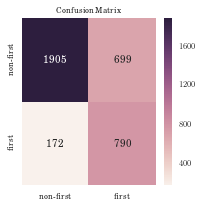

In [187]:
test_classify(y_data_test, clf.predict(x_data_test), clf.classes_, class_names)

In [181]:
print '\n'.join(wordlists['non-identity_sim'])

similarity
тождественный
еще один
похожий
такой же
аналогичный
подобный
иной


In [188]:
for i, feat_name in enumerate(feature_names):
    print '{}: {:.4f}'.format(feat_name, clf.coef_[0,i])

str_match_before=0: 1.0904
str_match_before<2: -0.0704
str_match_before < 3: 0.1171
str_match_before>2: -0.4735
head_match_before=0: 1.2394
head_match_before<2: 0.3106
head_match_before < 3: -0.2663
head_match_before>2: -0.0901
uppercase: -0.6143
latin: -0.4735
is_proper_noun: -0.9239
is_pronoun: 0.0000
conj: -0.1072
len_np<2: -0.2964
len_np>2: 0.3172
n_adj=0: -0.0161
n_adj > 1: 0.0012
n_adj>2: -0.5231
in_list_refer_to_CommKnowl: 0.4179
in_list_adj-top50: 0.9041
in_list_role_assess: -0.4250
in_list_NewRef: -0.5883
in_list_non-identity_sim: -0.4523
in_list_possessives: -2.3525
in_list_subjectivity: -1.0180
in_list_class: 0.9906
in_list_demonstratives: -1.6133
in_list_indef: 1.2672


### Эксперименты

In [97]:
cur_sampling = 'SMOTE, kind=borderline1, ratio={:.3f}'.format(ratio)

feature_groups = ('string', 'struct', 'lists')

def experiment(feature_groups):
    x_data, y_data, feature_names, ratio = get_features_binary_no_singletons(feature_groups)
    
    clf, x_data_train, y_data_train, x_data_test, y_data_test, groups_test = fit_clf(x_data, y_data, 
                                                                        RandomForestClassifier(n_estimators=200,
                                                                                           random_state=42),
                                                                       sampler = SMOTE(ratio=ratio, verbose=False, 
                                                                                   kind='borderline1', random_state=42))
    test_classify(y_data_test, clf.predict(x_data_test), clf.classes_, class_names, 
                  ': {}'.format(', '.join(feature_groups)))
    
    return groups_test

Эксперимент "Binary, filtered singletons with SMOTE, kind=borderline1, ratio=2.548, classifier=RandomForestClassifier"
Report : string, struct, lists:              precision    recall  f1-score   support

        0.0      0.881     0.806     0.842      2604
        1.0      0.573     0.705     0.632       962

avg / total      0.798     0.778     0.785      3566



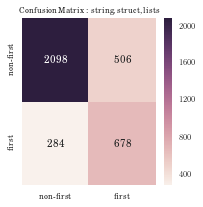

In [189]:
feature_groups = ('string', 'struct', 'lists')
groups_test = experiment(feature_groups)

Эксперимент "Binary, filtered singletons with SMOTE, kind=borderline1, ratio=2.548, classifier=RandomForestClassifier"
Report : string:              precision    recall  f1-score   support

        0.0      0.899     0.757     0.822      2604
        1.0      0.539     0.770     0.634       962

avg / total      0.802     0.761     0.771      3566



[Он(Ncmsnn, 5928),
 Were(Ncmsnn, 19237),
 Гаги(Ncmpnn, 3302),
 дамы(Ncfsgy, 1619),
 Николай Ильич(Npmsny, 3932),
 стране ядерного оружия(Ncfsln, 604),
 Лама(Npmsny, 4505),
 авторы(Ncmpny, 8352),
 той(P--fsga, 2162),
 я(P-1-snn, 1629),
 Ансар(Npmsny, 1572),
 мастеров(Ncmpgy, 5449),
 безмерный аппетит(Ncmsnn, 1900),
 Закрытый показ(Ncmsnn, 898),
 нам(P-1-pdn, 444),
 Он(Ncmsnn, 6266),
 чья(P--fsna, 9195),
 прокуратуры(Ncfsgn, 481),
 Пакистана(Ncmsgn, 2104),
 наш(P--msna, 4205),
 Пакистана(Ncmsgn, 4257),
 красивая Марина(Npfsny, 16347),
 Михаил Родионов(Npmsny, 224),
 Александр Гордон(Npmsny, 3153),
 биеннале(Ncnpgn, 1899),
 Я(P-1-snn, 4008),
 Were(Ncmsnn, 1951),
 Украины(Ncfsgn, 47),
 принятые изменения(Ncnpan, 1829),
 мы(P-1-pnn, 22286),
 кукушка(Ncfsnn, 1050),
 Данилюк(Npfsny, 2549),
 министр(Ncmsny, 3009),
 Марса(Ncmsgn, 14685),
 книги(Ncfsgn, 3974),
 книга(Ncfsnn, 1131),
 тот самый город(Ncmsan, 2312),
 Уэльса(Ncmsgn, 23),
 Россией(Ncfsin, 236),
 Россию(Ncfsan, 11642),
 Страны НАТО(Nc

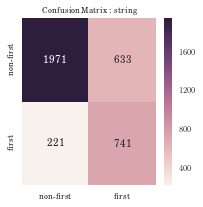

In [190]:
experiment(('string',))

Эксперимент "Binary, filtered singletons with SMOTE, kind=borderline1, ratio=2.548, classifier=RandomForestClassifier"
Report : string, struct:              precision    recall  f1-score   support

        0.0      0.877     0.800     0.837      2604
        1.0      0.563     0.698     0.623       962

avg / total      0.793     0.773     0.779      3566



[Он(Ncmsnn, 5928),
 Were(Ncmsnn, 19237),
 Гаги(Ncmpnn, 3302),
 дамы(Ncfsgy, 1619),
 Николай Ильич(Npmsny, 3932),
 стране ядерного оружия(Ncfsln, 604),
 Лама(Npmsny, 4505),
 авторы(Ncmpny, 8352),
 той(P--fsga, 2162),
 я(P-1-snn, 1629),
 Ансар(Npmsny, 1572),
 мастеров(Ncmpgy, 5449),
 безмерный аппетит(Ncmsnn, 1900),
 Закрытый показ(Ncmsnn, 898),
 нам(P-1-pdn, 444),
 Он(Ncmsnn, 6266),
 чья(P--fsna, 9195),
 прокуратуры(Ncfsgn, 481),
 Пакистана(Ncmsgn, 2104),
 наш(P--msna, 4205),
 Пакистана(Ncmsgn, 4257),
 красивая Марина(Npfsny, 16347),
 Михаил Родионов(Npmsny, 224),
 Александр Гордон(Npmsny, 3153),
 биеннале(Ncnpgn, 1899),
 Я(P-1-snn, 4008),
 Were(Ncmsnn, 1951),
 Украины(Ncfsgn, 47),
 принятые изменения(Ncnpan, 1829),
 мы(P-1-pnn, 22286),
 кукушка(Ncfsnn, 1050),
 Данилюк(Npfsny, 2549),
 министр(Ncmsny, 3009),
 Марса(Ncmsgn, 14685),
 книги(Ncfsgn, 3974),
 книга(Ncfsnn, 1131),
 тот самый город(Ncmsan, 2312),
 Уэльса(Ncmsgn, 23),
 Россией(Ncfsin, 236),
 Россию(Ncfsan, 11642),
 Страны НАТО(Nc

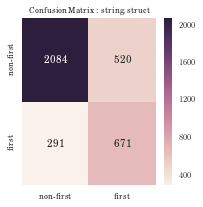

In [191]:
experiment(('string', 'struct'))

Эксперимент "Binary, filtered singletons with SMOTE, kind=borderline1, ratio=2.548, classifier=RandomForestClassifier"
Report : string, struct, lists:              precision    recall  f1-score   support

        0.0      0.881     0.806     0.842      2604
        1.0      0.573     0.705     0.632       962

avg / total      0.798     0.778     0.785      3566



[Он(Ncmsnn, 5928),
 Were(Ncmsnn, 19237),
 Гаги(Ncmpnn, 3302),
 дамы(Ncfsgy, 1619),
 Николай Ильич(Npmsny, 3932),
 стране ядерного оружия(Ncfsln, 604),
 Лама(Npmsny, 4505),
 авторы(Ncmpny, 8352),
 той(P--fsga, 2162),
 я(P-1-snn, 1629),
 Ансар(Npmsny, 1572),
 мастеров(Ncmpgy, 5449),
 безмерный аппетит(Ncmsnn, 1900),
 Закрытый показ(Ncmsnn, 898),
 нам(P-1-pdn, 444),
 Он(Ncmsnn, 6266),
 чья(P--fsna, 9195),
 прокуратуры(Ncfsgn, 481),
 Пакистана(Ncmsgn, 2104),
 наш(P--msna, 4205),
 Пакистана(Ncmsgn, 4257),
 красивая Марина(Npfsny, 16347),
 Михаил Родионов(Npmsny, 224),
 Александр Гордон(Npmsny, 3153),
 биеннале(Ncnpgn, 1899),
 Я(P-1-snn, 4008),
 Were(Ncmsnn, 1951),
 Украины(Ncfsgn, 47),
 принятые изменения(Ncnpan, 1829),
 мы(P-1-pnn, 22286),
 кукушка(Ncfsnn, 1050),
 Данилюк(Npfsny, 2549),
 министр(Ncmsny, 3009),
 Марса(Ncmsgn, 14685),
 книги(Ncfsgn, 3974),
 книга(Ncfsnn, 1131),
 тот самый город(Ncmsan, 2312),
 Уэльса(Ncmsgn, 23),
 Россией(Ncfsin, 236),
 Россию(Ncfsan, 11642),
 Страны НАТО(Nc

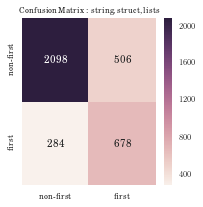

In [192]:
experiment(('string', 'struct', 'lists'))

In [ ]:
clf_name = str(clf)[:str(clf).find('(')]
print 'Эксперимент "{} with {}, classifier={}"'.format(cur_data, cur_sampling, clf_name)
x_data_train, x_data_test, y_data_train, y_data_test = cross_validation.train_test_split(x_data, 
                                                                                         y_data, 
                                                                                         test_size=0.2,
                                                                                         random_state=42)
groups_train = [row[-1] for row in x_data_train]
groups_test = [row[-1] for row in x_data_test]

x_old_train = [row[:-1] for row in x_data_train]
x_old_test = [row[:-1] for row in x_data_test]

#x_add_train = additional_features(x_data_train, adj_vectorizer)
#x_add_test = additional_features(x_data_test, adj_vectorizer)

#feat_sel = SelectKBest(chi2, k=10)
#feat_sel.fit(x_add_train, y_data_train)

#best_adj = {adj_vectorizer.vocabulary[i]:feat_sel.scores_[i] 
#            for i in xrange(len(feat_sel.scores_)) if not np.isnan(feat_sel.scores_[i])}
feature_names = feature_names[:len(x_data[0])-1]
#feature_names.extend(u'adj={}'.format(adj) 
#                     for adj in sorted(best_adj, key=lambda a: best_adj[a], reverse=True)[:feat_sel.k])

#x_add_train_sel = feat_sel.transform(x_add_train)
#x_add_test_sel = feat_sel.transform(x_add_test)

#x_data_train = np.concatenate((x_old_train, x_add_train_sel), axis=1)
#x_data_test = np.concatenate((x_old_test, x_add_test_sel), axis=1)
x_data_train = x_old_train
x_data_test = x_old_test

sampled_x_train, sampled_y_train = sampler.fit_transform(np.array(x_data_train), np.array(y_data_train))
if isinstance(sampler, EasyEnsemble) or isinstance(sampler, BalanceCascade):
    sampled_x_train = sampled_x_train[-1]
    sampled_y_train = sampled_y_train[-1]
clf.fit(sampled_x_train, sampled_y_train)

In [ ]:
feature_names

### Посчитаем Baseline

In [91]:
def baseline_predict(data):
    y_pred = np.zeros(len(data))
    for i, row in enumerate(data):
        y_pred[i] = row[0] == 1
    
    return y_pred

Report :              precision    recall  f1-score   support

        0.0      0.915     0.702     0.795      2604
        1.0      0.505     0.824     0.627       962

avg / total      0.805     0.735     0.749      3566



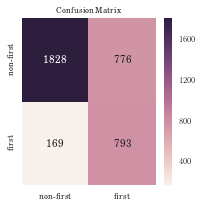

In [193]:
test_classify(y_data_test, baseline_predict(x_data_test), clf.classes_, class_names)

### Проанализируем важность фичей

In [ ]:
feat_names = {feature_names[i]: clf.feature_importances_[i] for i in range(len(clf.feature_importances_))}

for feat in sorted(feat_names, key=lambda f: feat_names[f], reverse=True):
    print u'{} = {:.4f}'.format(feat, feat_names[feat])

In [93]:
from sklearn.tree import export_graphviz

export_graphviz(clf, out_file='clf_tree.entropy.dot', 
                feature_names=feature_names, class_names=class_names, max_depth=4)

AttributeError: 'LogisticRegression' object has no attribute 'tree_'

In [94]:
len(feature_names)

28

In [99]:
y_pred = clf.predict(x_data_test)
fp = []
fn = []
for i, res in enumerate(y_pred):
    if y_data_test[i] and not y_pred[i]:
        fn.append(groups_test[i])
    elif not y_data_test[i] and y_pred[i]:
        fp.append(groups_test[i])
        #print y_pred[i], y_data_test[i], groups_test[i]

In [100]:
with codecs.open('false_positives.txt', 'w', 'utf-8') as out_file:
    for g in fp:
        out_file.write(u'{}\t{}\t{}\n'.format(' '.join(g.wordform), g.tag, g.offset))

In [101]:
with codecs.open('false_negatives.txt', 'w', 'utf-8') as out_file:
    for g in fn:
        out_file.write(u'{}\t{}\t{}\n'.format(' '.join(g.wordform), g.tag, g.offset))